In [14]:
from typing_extensions import TypedDict


class State(TypedDict):
    title: str
    content: str
    summarized: str
    questions: str

In [15]:
from langchain_ollama import ChatOllama

llm_model = ChatOllama(model="llama3.1:latest")

In [16]:
import random


def generate_content(state: State):
    content = llm_model.invoke(f"Generate a 500 word writeup on this topic {state['title']}").content
    return {"content": content}


def evaluate_writeup(state: State):
    return "PASS" if random.random() >= 0.5 else "FAIL"


def summarize_content(state: State):
    summarized_content = llm_model.invoke(f"Summarize this writeup: {state['content']}").content
    return {"summarized": summarized_content}


def quiz_generator(state: State):
    questions = llm_model.invoke(f"Generate a quiz from: {state['content']}").content
    return {"questions": questions}



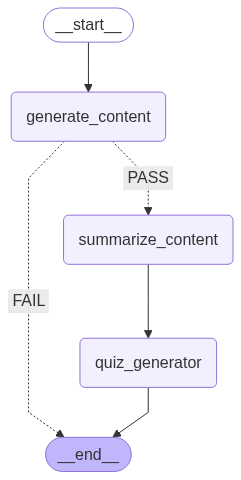

In [17]:
# from langgraph.constants import START
from langgraph.graph import StateGraph, START, END

graph_builder = StateGraph(State)

# nodes
graph_builder.add_node("generate_content", generate_content)
graph_builder.add_node("summarize_content", summarize_content)
# graph.add_node("evaluate_writeup",evaluate_writeup)
graph_builder.add_node("quiz_generator", quiz_generator)

#edges

graph_builder.add_edge(START, "generate_content")
graph_builder.add_conditional_edges("generate_content", evaluate_writeup, {"PASS": "summarize_content", "FAIL": END})
graph_builder.add_edge("summarize_content", "quiz_generator")
graph_builder.add_edge("quiz_generator", END)
graph = graph_builder.compile()
graph



In [18]:
results = graph.invoke({"title":"Artificial intelligence"})
results

{'title': 'Artificial intelligence',
 'content': "**The Rise of Artificial Intelligence: Revolutionizing the World One Algorithm at a Time**\n\nArtificial intelligence (AI) has been one of the most exciting and rapidly evolving technologies in recent years. From self-driving cars to virtual assistants, AI is transforming the way we live, work, and interact with each other. In this write-up, we'll delve into the world of AI, exploring its benefits, applications, and future prospects.\n\n**What is Artificial Intelligence?**\n\nArtificial intelligence refers to the development of computer systems that can perform tasks that typically require human intelligence, such as learning, problem-solving, decision-making, and perception. These systems use algorithms and data to analyze situations, make predictions, and take actions, often with a level of accuracy and speed unmatched by humans.\n\n**Types of Artificial Intelligence**\n\nThere are several types of AI, each with its own unique charact